# Data Import 

In [248]:
import pandas as pd
import numpy as np
from datetime import datetime 
raw_data=pd.read_csv("googleplaystoreclean.csv").drop(columns=["Unnamed: 0"])
raw_data.skew()

Rating      -1.850135
Reviews     15.303031
Installs     8.885431
Price       24.394446
dtype: float64

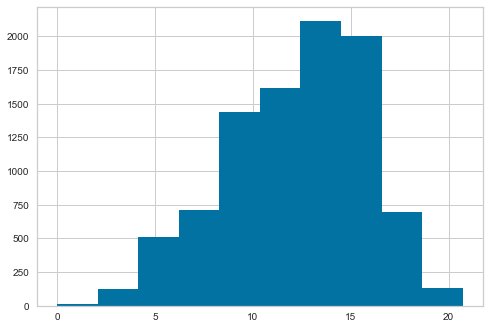

In [260]:
# import 
np.log(raw_data.loc[:,"Installs"]).hist()

In [259]:
raw_data.loc[:,"Installs"]

,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,10000.0,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,5000000.0,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,50000000.0,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,100000.0,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...
9355,FR Calculator,FAMILY,4.0,7.0,500.0,Free,0.0,Everyone,Education,2017-06-18,1.0.0,4.1 and up
9356,Sya9a Maroc - FR,FAMILY,4.5,38.0,5000.0,Free,0.0,Everyone,Education,2017-07-25,1.48,4.1 and up
9357,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4.0,100.0,Free,0.0,Everyone,Education,2018-07-06,1.0,4.1 and up
9358,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114.0,1000.0,Free,0.0,Mature 17+,Books & Reference,2015-01-19,Varies with device,Varies with device


In [250]:
raw_data.shape

(9360, 12)

# Data Cleaning

In [121]:
reference={}
reference["Category"]=raw_data.loc[0,"Category"]
category_dummy=pd.get_dummies(raw_data.Category,drop_first=True)
data_category=pd.concat([raw_data.iloc[:,0],category_dummy,raw_data.iloc[:,2:]],axis=1)#replace the category column with dummy vairable columns

In [122]:
data_category.isnull().any()#check if there any missing data in rating

App                    False
AUTO_AND_VEHICLES      False
BEAUTY                 False
BOOKS_AND_REFERENCE    False
BUSINESS               False
COMICS                 False
COMMUNICATION          False
DATING                 False
EDUCATION              False
ENTERTAINMENT          False
EVENTS                 False
FAMILY                 False
FINANCE                False
FOOD_AND_DRINK         False
GAME                   False
HEALTH_AND_FITNESS     False
HOUSE_AND_HOME         False
LIBRARIES_AND_DEMO     False
LIFESTYLE              False
MAPS_AND_NAVIGATION    False
MEDICAL                False
NEWS_AND_MAGAZINES     False
PARENTING              False
PERSONALIZATION        False
PHOTOGRAPHY            False
PRODUCTIVITY           False
SHOPPING               False
SOCIAL                 False
SPORTS                 False
TOOLS                  False
TRAVEL_AND_LOCAL       False
VIDEO_PLAYERS          False
WEATHER                False
Rating                 False
Reviews       

In [123]:
reference["Content Rating"]=pd.get_dummies(raw_data.loc[:,"Content Rating"]).columns[0]
ContentRating_dummy=pd.get_dummies(raw_data.loc[:,"Content Rating"],drop_first=True)
index_ContentRating=data_category.columns.to_list().index("Content Rating")
data_contentrating=pd.concat([data_category.iloc[:,:index_ContentRating],ContentRating_dummy,data_category.iloc[:,index_ContentRating+1:]],axis=1)

In [124]:
reference["Type"]=pd.get_dummies(raw_data.loc[:,"Type"]).columns[0]
type_dummy=pd.get_dummies(raw_data.loc[:,"Type"],drop_first=True)
index_type=data_contentrating.columns.to_list().index("Type")
data_type=pd.concat([data_contentrating.iloc[:,:index_type],type_dummy,data_contentrating.iloc[:,index_type+1:]],axis=1)

In [125]:
# genres1_dummy=pd.get_dummies(data_type.loc[:,'Genres'].str.split(";",expand=True).iloc[:,1])
# genres2_dummy=pd.get_dummies(data_type.loc[:,'Genres'].str.split(";",expand=True).iloc[:,0])
# temp_genres=pd.concat([genres1_dummy,genres2_dummy],axis=1)
# genres_dummy=temp_genres.groupby(temp_genres.columns, axis=1).agg(np.max)
# data_genres=pd.concat([data_type.iloc[:,:46],genres_dummy,data_type.iloc[:,47:]],axis=1)

In [126]:
# genres_dummy.shape

In [127]:
reference["Genres_First"]=pd.get_dummies(data_type.loc[:,'Genres'].str.split(";",expand=True).iloc[:,0]).columns[0]
reference["Genres_Second"]=pd.get_dummies(data_type.loc[:,'Genres'].str.split(";",expand=True).iloc[:,1]).columns[0]
second=data_type.loc[:,'Genres'].str.split(";",expand=True).iloc[:,1]
first=data_type.loc[:,'Genres'].str.split(";",expand=True).iloc[:,0]
genres_dummy=pd.get_dummies(pd.concat([first,second],axis=1),drop_first=True)
index_genres=data_type.columns.to_list().index("Genres")
data_genres=pd.concat([data_type.iloc[:,:index_genres],genres_dummy,data_type.iloc[:,index_genres+1:]],axis=1)

In [128]:
data_genres.loc[:,'Last Updated']=pd.to_datetime(data_genres.loc[:,'Last Updated'])
data_genres.loc[:,'Last Updated']=data_genres.loc[:,'Last Updated'].max()-data_genres.loc[:,'Last Updated']
data_genres.loc[:,'Last Updated']=data_genres.loc[:,'Last Updated'].apply(lambda t:t.days)

In [129]:
data_final=data_genres.drop(columns=['Current Ver'])

In [130]:
data_final_varies=data_final.loc[data_final.loc[:,"Android Ver"]=="Varies with device",:].reset_index().drop(columns=["index","Android Ver"])
data_final_normal=data_final.loc[data_final.loc[:,"Android Ver"]!="Varies with device",:].reset_index().drop(columns=["index"])

In [131]:
def version1(a):
    t=a.split()[0].split(".")
    n=100
    sum=0
    for ch in t:
        if ch=='4W':
            sum+=4*n
            n/=10
        else:
            sum+=int(ch)*n
            n/=10
    return int(sum)

In [132]:
data_final_normal.loc[:,"Android Ver"]=data_final_normal.loc[:,"Android Ver"].apply(lambda t:version1(t))

In [133]:
for x,y in enumerate(data_final_normal.columns):
    print(x,y)
    

0 App
1 AUTO_AND_VEHICLES
2 BEAUTY
3 BOOKS_AND_REFERENCE
4 BUSINESS
5 COMICS
6 COMMUNICATION
7 DATING
8 EDUCATION
9 ENTERTAINMENT
10 EVENTS
11 FAMILY
12 FINANCE
13 FOOD_AND_DRINK
14 GAME
15 HEALTH_AND_FITNESS
16 HOUSE_AND_HOME
17 LIBRARIES_AND_DEMO
18 LIFESTYLE
19 MAPS_AND_NAVIGATION
20 MEDICAL
21 NEWS_AND_MAGAZINES
22 PARENTING
23 PERSONALIZATION
24 PHOTOGRAPHY
25 PRODUCTIVITY
26 SHOPPING
27 SOCIAL
28 SPORTS
29 TOOLS
30 TRAVEL_AND_LOCAL
31 VIDEO_PLAYERS
32 WEATHER
33 Rating
34 Reviews
35 Installs
36 Paid
37 Price
38 Everyone
39 Everyone 10+
40 Mature 17+
41 Teen
42 Unrated
43 0_Adventure
44 0_Arcade
45 0_Art & Design
46 0_Auto & Vehicles
47 0_Beauty
48 0_Board
49 0_Books & Reference
50 0_Business
51 0_Card
52 0_Casino
53 0_Casual
54 0_Comics
55 0_Communication
56 0_Dating
57 0_Education
58 0_Educational
59 0_Entertainment
60 0_Events
61 0_Finance
62 0_Food & Drink
63 0_Health & Fitness
64 0_House & Home
65 0_Libraries & Demo
66 0_Lifestyle
67 0_Maps & Navigation
68 0_Medical
69 0_Musi

# Q1: How can she / he maximize the number of installs?

## Linear Regression

In [134]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
Y=data_final_normal.iloc[:,data_final_normal.columns.to_list().index("Installs")]
mask=list(range(1,len(data_final_normal.columns.to_list())))
mask.remove(data_final_normal.columns.to_list().index("Installs"))
X=data_final_normal.iloc[:,mask]

In [135]:
##Normalize
X_train_raw=(X-X.mean())/(X.std())

# Y_train=(Y-Y.mean())/(Y.std())

C:\Users\Aaron\anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


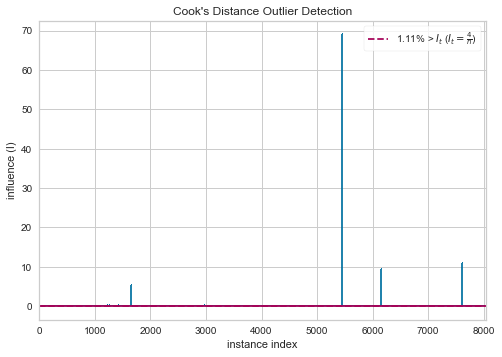

1.1068275090162913

In [136]:
#detect outlier and remove the outliers
from yellowbrick.regressor import CooksDistance, cooks_distance
cooksdistance=cooks_distance(X_train_raw, Y,draw_threshold=True,linefmt="C0-", markerfmt=",")
cooksdistance.outlier_percentage_

In [137]:
mask_outlier=cooksdistance.distance_<cooksdistance.influence_threshold_
X_train=X_train_raw.loc[mask_outlier,:].reset_index().drop(columns=["index"])
Y_train=Y.loc[mask_outlier].reset_index().drop(columns=["index"])

In [276]:
mask_outlier1=[mask_outlier==False]
# X_train_raw.loc[mask_outlier1,:]
mask_outlier1

[0       False
 1       False
 2       False
 3       False
 4       False
         ...  
 8036    False
 8037    False
 8038    False
 8039    False
 8040    False
 Length: 8041, dtype: bool]

In [232]:
mask_outlier_1=[False for x in mask_outlier if x==True else True]

SyntaxError: invalid syntax (<ipython-input-232-cc24f350dadd>, line 1)

In [138]:
import statsmodels.api as sm
mod = sm.OLS(Y_train,X_train)
res=mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Installs   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     216.8
Date:                Mon, 02 Nov 2020   Prob (F-statistic):               0.00
Time:                        15:18:22   Log-Likelihood:            -1.3945e+05
No. Observations:                7952   AIC:                         2.791e+05
Df Residuals:                    7879   BIC:                         2.796e+05
Df Model:                          72                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
AUTO_AND_VEHICLES         -6.849e+17   1.97e+18     -0.347      0.729   -4.56e+18    3.19e+18
BEAUTY                    -9.427e+17   8.09e+17     -1.165      0.244   -2.53e+18    6.44e+17
BOOKS_AND_REFERENCE       -4.115e+05   1.28e+06     -0.321      0.748   -2.92e+06     2.1e+06
BUSINESS                  -4.494e+19   1.12e+19     -4.026      0.000   -6.68e+19   -2.31e+19
COMICS                     2.346e+18   1.12e+19      0.210      0.834   -1.96e+19    2.43e+19
COMMUNICATION             -1.659e+18   9.13e+18     -0.182      0.856   -1.95e+19    1.62e+19
DATING                    -2.189e+18   2.15e+18     -1.017      0.309   -6.41e+18    2.03e+18
EDUCATION                 -2.334e+05   7.53e+05     -0.310      0.757   -1.71e+06    1.24e+06
ENTERTAINMENT             -4.653e+04   6.96e+05     -0.067      0.947   -1.41e+06    1.32e+06
EVENTS                     7.826e+17    2.4e+18      0.326      0.745   -3.92e+18    5.49e+18
FAMILY                    -1.059e+06   2.53e+06     -0.418      0.676   -6.03e+06    3.91e+06
FINANCE                   -6.303e+18   2.63e+19     -0.240      0.811   -5.79e+19    4.53e+19
FOOD_AND_DRINK            -9.543e+18   2.25e+19     -0.424      0.671   -5.36e+19    3.45e+19
GAME                          -1e+06   2.11e+06     -0.475      0.635   -5.13e+06    3.13e+06
HEALTH_AND_FITNESS         -4.45e+05   1.57e+06     -0.283      0.777   -3.53e+06    2.64e+06
HOUSE_AND_HOME            -2.947e+17   2.68e+19     -0.011      0.991   -5.29e+19    5.23e+19
LIBRARIES_AND_DEMO        -1.989e+18    1.4e+19     -0.142      0.887   -2.93e+19    2.54e+19
LIFESTYLE                  -1.42e+18   1.11e+19     -0.128      0.898   -2.31e+19    2.03e+19
MAPS_AND_NAVIGATION        1.301e+19   2.75e+19      0.472      0.637    -4.1e+19     6.7e+19
MEDICAL                    4.382e+18   1.73e+19      0.254      0.800   -2.95e+19    3.82e+19
NEWS_AND_MAGAZINES         9.593e+17   8.35e+18      0.115      0.909   -1.54e+19    1.73e+19
PARENTING                 -7.912e+17   7.19e+18     -0.110      0.912   -1.49e+19    1.33e+19
PERSONALIZATION            2.172e+18   9.46e+18      0.230      0.818   -1.64e+19    2.07e+19
PHOTOGRAPHY               -3.915e+18   1.33e+19     -0.295      0.768   -2.99e+19    2.21e+19
PRODUCTIVITY              -3.629e+18   2.08e+19     -0.174      0.862   -4.44e+19    3.72e+19
SHOPPING                  -1.611e+18   1.74e+19     -0.093      0.926   -3.57e+19    3.24e+19
SOCIAL                    -1.882e+18   2.43e+19     -0.078      0.938   -4.95e+19    4.57e+19
SPORTS                      1.28e+07   1.73e+06      7.412      0.000    9.41e+06    1.62e+07
TOOLS                      2.052e+18   1.73e+19      0.119      0.906   -3.19e+19     3.6e+19
TRAVEL_AND_LOCAL           1.295e+18   2.14e+19      0.061      0.952   -4.

C:\Users\Aaron\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


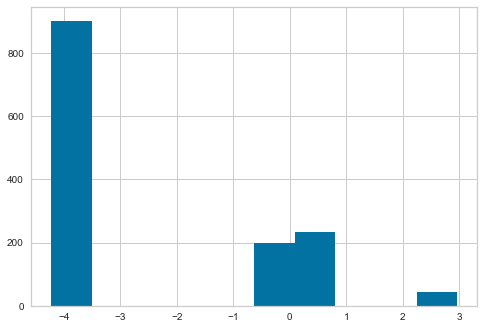

In [256]:
np.log(Y_train).hist()

In [139]:
##check which features are significant
results_as_html = res.summary().tables[1].as_html()
ols_table=pd.read_html(results_as_html, header=0, index_col=0)[0]
mask_ols=ols_table.loc[:,'P>|t|']<0.05
X.loc[:,mask_ols].columns.to_list()

['BUSINESS',
 'SPORTS',
 'Reviews',
 'Paid',
 '0_Arcade',
 '0_Business',
 '0_Casual',
 '0_Education',
 '0_Entertainment',
 '0_Role Playing',
 '0_Simulation',
 '0_Sports',
 '0_Strategy',
 '0_Trivia',
 '1_Music & Video',
 '1_Pretend Play',
 'Last Updated']

In [140]:
##test collinearity and abandon the feature with high VIF, remove the feature with VIF higher than 10
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif.loc[:,"variables"] = X_train.columns
vif.loc[:,"VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
index_vif=vif.loc[vif.loc[:,"VIF"]<10,"variables"]
index_vif

32             Rating
33            Reviews
34               Paid
35              Price
40            Unrated
41        0_Adventure
42           0_Arcade
46            0_Board
49             0_Card
50           0_Casino
51           0_Casual
55        0_Education
56      0_Educational
57    0_Entertainment
67            0_Music
68    0_Music & Audio
74           0_Puzzle
75           0_Racing
76     0_Role Playing
78       0_Simulation
81         0_Strategy
84           0_Trivia
87             0_Word
88      1_Brain Games
89       1_Creativity
90        1_Education
91    1_Music & Video
92     1_Pretend Play
93       Last Updated
94        Android Ver
Name: variables, dtype: object

In [141]:
#retest collinearity
X_vif=X.loc[:,index_vif]
new_vif = pd.DataFrame()
new_vif.loc[:,"variables"] = X_vif.columns
new_vif.loc[:,"VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
new_vif

,variables,VIF
0,Rating,23.782818
1,Reviews,1.115831
2,Paid,1.215834
3,Price,1.065489
4,Unrated,1.003605
5,0_Adventure,1.020066
6,0_Arcade,1.055142
7,0_Board,1.082707
8,0_Card,1.009232
9,0_Casino,1.008028


In [142]:
#drop the feature with high VIF and recheck, the VIF looks normal
X_vif=X_vif.drop(columns=["Rating","Android Ver"])
new_vif = pd.DataFrame()
new_vif.loc[:,"variables"] = X_vif.columns
new_vif.loc[:,"VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
new_vif

,variables,VIF
0,Reviews,1.091680
1,Paid,1.196612
2,Price,1.064149
3,Unrated,1.003437
4,0_Adventure,1.011081
5,0_Arcade,1.031991
6,0_Board,1.077263
7,0_Card,1.006298
8,0_Casino,1.002508
9,0_Casual,1.115773


In [143]:
new_index_vif=new_vif.loc[new_vif.loc[:,"VIF"]<10,"variables"]
# index_vif_p=list(set(X.loc[:,mask_ols].columns.to_list()+new_vif.loc[:,"variables"].to_list()))
index_vif_p=X.loc[:,mask_ols].columns.to_list()
X_vif=X.loc[:,index_vif_p]

In [144]:
X.loc[:,mask_ols].columns.to_list()

['BUSINESS',
 'SPORTS',
 'Reviews',
 'Paid',
 '0_Arcade',
 '0_Business',
 '0_Casual',
 '0_Education',
 '0_Entertainment',
 '0_Role Playing',
 '0_Simulation',
 '0_Sports',
 '0_Strategy',
 '0_Trivia',
 '1_Music & Video',
 '1_Pretend Play',
 'Last Updated']

In [145]:
##Normalize
X_train_vif=(X_vif-X_vif.mean())/(X_vif.std())
Y_train=(Y-Y.mean())/(Y.std())

In [146]:
mod_vif = sm.OLS(Y_train,X_train_vif)
res_vif=mod_vif.fit()
res_vif.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               Installs   R-squared (uncentered):                   0.418
Model:                            OLS   Adj. R-squared (uncentered):              0.417
Method:                 Least Squares   F-statistic:                              360.6
Date:                Mon, 02 Nov 2020   Prob (F-statistic):                        0.00
Time:                        15:18:31   Log-Likelihood:                         -9231.4
No. Observations:                8041   AIC:                                  1.849e+04
Df Residuals:                    8025   BIC:                                  1.861e+04
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
BUSINESS           -0.0048      0.004     -1.129      0.259      -0.013       0.004
SPORTS              0.2081      0.034      6.159      0.000       0.142       0.274
Reviews             0.6444      0.009     71.889      0.000       0.627       0.662
Paid               -0.0121      0.009     -1.387      0.165      -0.029       0.005
0_Arcade            0.0572      0.009      6.633      0.000       0.040       0.074
0_Business         -0.0048      0.004     -1.129      0.259      -0.013       0.004
0_Casual            0.0215      0.009      2.434      0.015       0.004       0.039
0_Education        -0.0165      0.009     -1.903      0.057      -0.033       0.000
0_Entertainment    -0.0092      0.009     -1.054      0.292      -0.026       0.008
0_Role Playing     -0.0096      0.009     -1.126      0.260      -0.026       0.007
0_Simulation       -0.0109      0.009     -1.271      0.204      -0.028       0.006
0_Sports           -0.2288      0.034     -6.762      0.000      -0.295      -0.162
0_Strategy         -0.0902      0.009    -10.381      0.000      -0.107      -0.073
0_Trivia           -0.0048      0.009     -0.564      0.573      -0.022       0.012
1_Music & Video     0.0048      0.009      0.556      0.578      -0.012       0.022
1_Pretend Play     -0.0021      0.009     -0.241      0.809      -0.019       0.015
Last Updated       -0.0355      0.009     -4.083      0.000      -0.053      -0.018
==============================================================================
Omnibus:                    12815.668   Durbin-Watson:                   1.849
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         27193077.152
Skew:                           9.786   Prob(JB):                         0.00
Kurtosis:                     287.219   Cond. No.                     1.19e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.16e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [147]:
results_as_html = res_vif.summary().tables[1].as_html()
vif_table=pd.read_html(results_as_html, header=0, index_col=0)[0]
mask_final=vif_table.loc[:,'P>|t|']<0.05

In [148]:
#coefficient
vif_table.loc[mask_final,"coef"]

SPORTS          0.2081
Reviews         0.6444
0_Arcade        0.0572
0_Casual        0.0215
0_Sports       -0.2288
0_Strategy     -0.0902
Last Updated   -0.0355
Name: coef, dtype: float64

In [149]:
mask_final[mask_final==True].index

Index(['SPORTS', 'Reviews', '0_Arcade', '0_Casual', '0_Sports', '0_Strategy',
       'Last Updated'],
      dtype='object')

## Recommendation

### 1. No apps with strategy genre

In [245]:
import matplotlib.pyplot as plt
genres_free=raw_data.loc[raw_data.loc[:,"Type"]=="Free"].groupby(["Genres"]).mean()
genres_paid=raw_data.loc[raw_data.loc[:,"Type"]!="Free"].groupby(["Genres"]).mean()

genres_s_paid=["Strategy" in x for x in genres_paid.index]
genres_not_s_paid=["Strategy" not in x for x in genres_paid.index]
genres_s_free=["Strategy" in x for x in genres_free.index]
genres_not_s_free=["Strategy" not in x for x in genres_free.index]
gs_free=genres_free.iloc[genres_s_free]
gns_free=genres_free.iloc[genres_not_s_free]
gs_paid=genres_paid.iloc[genres_s_paid]
gns_paid=genres_paid.iloc[genres_not_s_paid]
gs_free
# genres_s_free

,Rating,Reviews,Installs,Price
Genres,,,,
Strategy,4.218889,3.632173e+06,2.191269e+07,0.0
Strategy;Action & Adventure,4.600000,1.917000e+04,1.000000e+06,0.0
Strategy;Creativity,4.400000,1.295420e+05,1.000000e+06,0.0
Strategy;Education,4.500000,2.062000e+03,5.000000e+05,0.0


Text(0.5, 0, 'Genres')

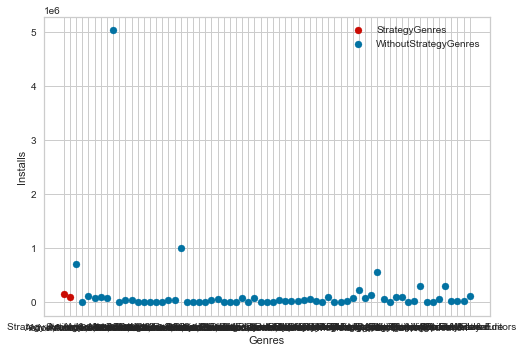

In [246]:
plt.scatter(gs_paid.index,gs_paid.Installs,c="r",label='StrategyGenres')
plt.scatter(gns_paid.index,gns_paid.Installs,c="b",label='WithoutStrategyGenres')
plt.legend()
plt.ylabel("Installs")
plt.xlabel("Genres")

Text(0.5, 0, 'Genres')

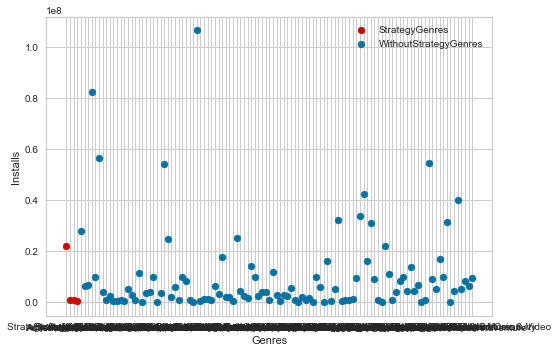

In [243]:
plt.scatter(gs_free.index,gs_free.Installs,c="r",label='StrategyGenres')
plt.scatter(gns_free.index,gns_free.Installs,c="b",label='WithoutStrategyGenres')
plt.legend()
plt.ylabel("Installs")
plt.xlabel("Genres")

In [233]:
genres

,Rating,Reviews,Installs,Price
Genres,,,,
Action,4.285475,9.785026e+05,2.609508e+07,0.232570
Action;Action & Adventure,4.311765,1.378545e+05,5.177676e+06,0.527647
Adventure,4.180822,4.072835e+05,5.571168e+06,0.738082
Adventure;Action & Adventure,4.423077,3.087739e+06,6.970385e+07,0.767692
Adventure;Brain Games,4.600000,7.148000e+03,1.000000e+05,2.990000
...,...,...,...,...
Video Players & Editors,4.063924,6.968409e+05,3.928416e+07,0.066203
Video Players & Editors;Creativity,4.100000,1.596205e+05,5.000000e+06,0.000000
Video Players & Editors;Music & Video,4.000000,9.271800e+04,8.333333e+06,0.000000


Text(0.5, 0, 'Genres')

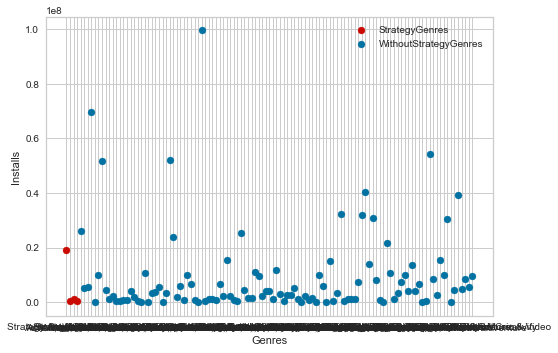

In [151]:
plt.scatter(gs.index,gs.Installs,c="r",label='StrategyGenres')
plt.scatter(gns.index,gns.Installs,c="b",label='WithoutStrategyGenres')
plt.legend()
plt.ylabel("Installs")
plt.xlabel("Genres")

In [152]:
##the mean value of installs with and without strategy genre. Apprearently the mean of installs without strategy genre is less than 
print("Mean value of installs with strategy genre is {}".format(gs.loc[:,"Installs"].mean()))
print("Mean value of installs without strategy genre is {}".format(gns.loc[:,"Installs"].mean()))

Mean value of installs with strategy genre is 5304095.8737864075
Mean value of installs without strategy genre is 9224093.903442258


In [153]:
gs.loc[:,"Installs"]

Genres
Strategy                       1.916638e+07
Strategy;Action & Adventure    5.500000e+05
Strategy;Creativity            1.000000e+06
Strategy;Education             5.000000e+05
Name: Installs, dtype: float64

In [154]:
#t test for two mean
import scipy
installs_gs=np.array(gs.loc[:,"Installs"])
installs_gns=np.array(gns.loc[:,"Installs"])

results=scipy.stats.ttest_ind(installs_gs, installs_gns,equal_var=False)
alpha = 0.05


In [155]:
results

Ttest_indResult(statistic=-0.8081698388904995, pvalue=0.46851866221329647)

### 2. Update the app frequently

In [156]:
#the coefficent of last updated is negative. the last update is the maximum date minus the last updated date. the value is large
#when the app has not been updated for long
vif_table.loc[mask_final,"coef"]

SPORTS          0.2081
Reviews         0.6444
0_Arcade        0.0572
0_Casual        0.0215
0_Sports       -0.2288
0_Strategy     -0.0902
Last Updated   -0.0355
Name: coef, dtype: float64

In [157]:
data_up=data_final_normal.loc[:,["Installs","Last Updated"]].sort_values(by=['Last Updated'])
data_up

,Installs,Last Updated
7603,50000.0,0
7990,1000.0,0
7957,5000.0,0
7756,50000000.0,0
2674,10000.0,1
...,...,...
6030,50000.0,2671
6264,5000000.0,2676
7669,100000.0,2702
5504,50000.0,2747


Text(0.5, 0, 'Days from last updated')

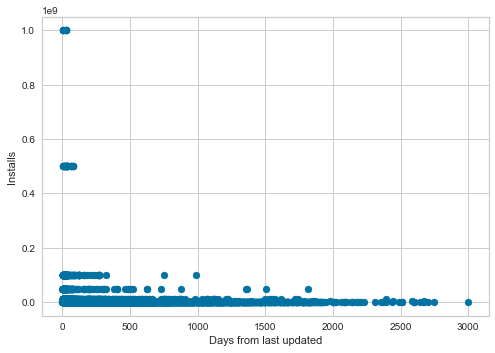

In [158]:
plt.scatter(data_up.loc[:,"Last Updated"],data_up.Installs)
plt.ylabel("Installs")
plt.xlabel("Days from last updated")

Text(0.5, 0, 'Days from last updated')

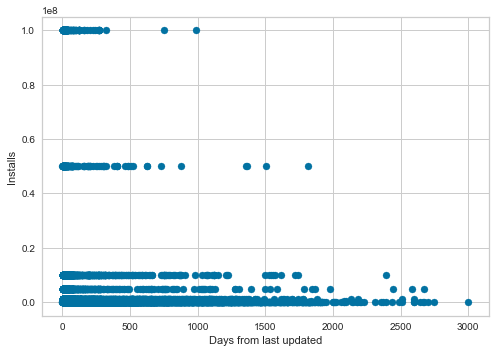

In [159]:
data_up_2e8=data_up.loc[data_up.loc[:,"Installs"]<2e8,:]
plt.scatter(data_up_2e8.loc[:,"Last Updated"],data_up_2e8.Installs)
plt.ylabel("Installs")
plt.xlabel("Days from last updated")

Text(0.5, 0, 'Days from last updated')

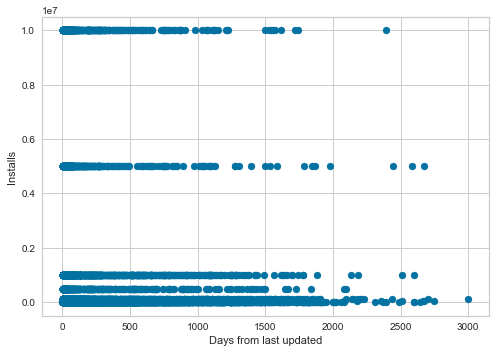

In [160]:
data_up_2e7=data_up.loc[data_up.loc[:,"Installs"]<2e7,:]
plt.scatter(data_up_2e7.loc[:,"Last Updated"],data_up_2e7.Installs)
plt.ylabel("Installs")
plt.xlabel("Days from last updated")

Text(0.5, 0, 'Days from last updated')

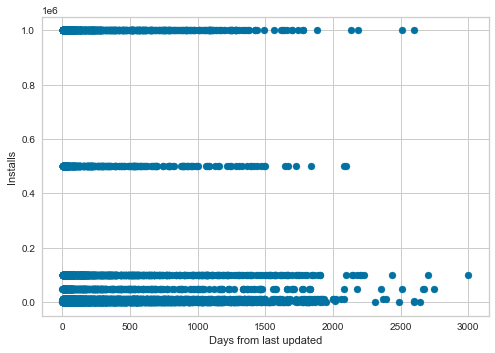

In [161]:
data_up_2e6=data_up.loc[data_up.loc[:,"Installs"]<2e6,:]
plt.scatter(data_up_2e6.loc[:,"Last Updated"],data_up_2e6.Installs)
plt.ylabel("Installs")
plt.xlabel("Days from last updated")

### 3. Develop app with genres Arcade or Casual        


In [162]:
import matplotlib.pyplot as plt
from scipy import stats
genres=raw_data.groupby(["Genres"]).mean()
genres_a=["Arcade" in x for x in genres.index]
genres_not_a=["Arcade" not in x for x in genres.index]
ga=genres.iloc[genres_a]
gna=genres.iloc[genres_not_a]

Text(0.5, 0, 'Genres')

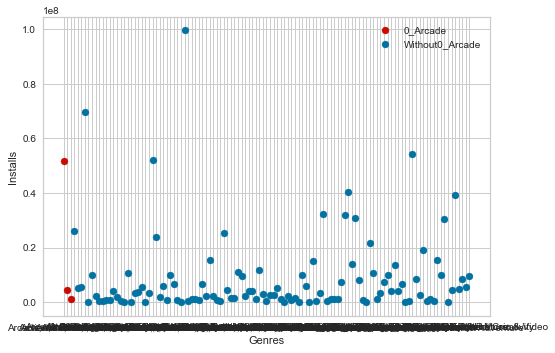

In [163]:
plt.scatter(ga.index,ga.Installs,c="r",label='0_Arcade')
plt.scatter(gna.index,gna.Installs,c="b",label='Without0_Arcade')
plt.legend()
plt.ylabel("Installs")
plt.xlabel("Genres")

In [164]:
#t test for two mean
import scipy
installs_ga=np.array(ga.loc[:,"Installs"])
installs_gna=np.array(gna.loc[:,"Installs"])

#H0: ga >= gna
#H1: ga <  gna
results=scipy.stats.ttest_ind(installs_ga, installs_gna,equal_var=False)
alpha = 0.05
if (results[0] > 0) & (results[1]/2 < alpha):
    print("reject null hypothesis, mean of {} is less than mean of {}".format('gns','gs'))
else:
    print("accept null hypothesis")

accept null hypothesis


In [165]:
results

Ttest_indResult(statistic=0.621400894308567, pvalue=0.596910053148464)

In [166]:
genres=raw_data.groupby(["Genres"]).mean()
genres_s=["0_Casual" in x for x in genres.index]
genres_not_s=["0_Casual" not in x for x in genres.index]
gs=genres.iloc[genres_s]
gns=genres.iloc[genres_not_s]

Text(0.5, 0, 'Genres')

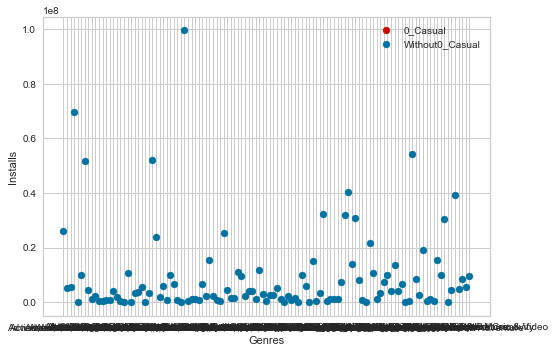

In [167]:
plt.scatter(gs.index,gs.Installs,c="r",label='0_Casual')
plt.scatter(gns.index,gns.Installs,c="b",label='Without0_Casual')
plt.legend()
plt.ylabel("Installs")
plt.xlabel("Genres")

### 4. Problem with Sport

In [168]:
data_SPORT=raw_data.loc[raw_data.loc[:,"Category"]=="SPORTS",:]
data_GAME=raw_data.loc[raw_data.loc[:,"Category"]=="GAME",:]
data_sport=raw_data.loc[raw_data.loc[:,"Genres"]=="Sports",:]
data_SPORT

,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2818,ESPN,SPORTS,4.2,521138.0,10000000.0,Free,0.00,Everyone 10+,Sports,2018-07-19,Varies with device,5.0 and up
2819,Free Sports TV,SPORTS,4.3,1802.0,100000.0,Free,0.00,Everyone,Sports,2018-06-21,1.4,4.0.3 and up
2820,LiveScore: Live Sport Updates,SPORTS,4.4,283662.0,10000000.0,Free,0.00,Everyone,Sports,2018-06-15,Varies with device,4.1 and up
2821,MLB At Bat,SPORTS,4.2,82882.0,5000000.0,Free,0.00,Everyone,Sports,2018-07-30,Varies with device,Varies with device
2822,NFL,SPORTS,4.1,459795.0,50000000.0,Free,0.00,Everyone,Sports,2018-08-02,Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...
9188,FL Racing Manager 2018 Pro,SPORTS,4.3,340.0,5000.0,Paid,1.99,Everyone,Sports,2018-03-17,1.18,3.0 and up
9198,Florida State Gameday,SPORTS,4.7,1566.0,50000.0,Free,0.00,Everyone,Sports,2018-07-13,9.19.2,4.1 and up
9229,Football Manager Mobile 2018,SPORTS,3.9,11460.0,100000.0,Paid,8.99,Everyone,Sports,2018-06-27,Varies with device,4.1 and up
9251,Hunting Safari 3D,SPORTS,4.2,36183.0,5000000.0,Free,0.00,Teen,Sports,2018-01-20,1.4,2.1 and up


In [169]:
#For the category SPORT, the genres must be sport
data_SPORT.loc[:,"Genres"].unique()

array(['Sports'], dtype=object)

In [170]:
#For the genres Sport, the category can be sport or game
data_sport.loc[:,"Category"].unique()

array(['GAME', 'SPORTS'], dtype=object)

In [171]:
data_sport_GAME=data_sport.loc[data_sport.loc[:,"Category"]=="GAME",:]
data_sport_GAME

,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1591,8 Ball Pool,GAME,4.5,14198297.0,100000000.0,Free,0.0,Everyone,Sports,2018-07-31,4.0.0,4.0.3 and up
1608,Shooting King,GAME,4.4,257724.0,10000000.0,Free,0.0,Everyone 10+,Sports,2018-05-25,1.4.2,4.0.3 and up
1619,8 Ball Pool,GAME,4.5,14198602.0,100000000.0,Free,0.0,Everyone,Sports,2018-07-31,4.0.0,4.0.3 and up
1625,Score! Hero,GAME,4.6,5418675.0,100000000.0,Free,0.0,Everyone,Sports,2018-06-13,1.751,4.4 and up
1655,Dream League Soccer 2018,GAME,4.6,9882639.0,100000000.0,Free,0.0,Everyone,Sports,2018-07-16,5.064,4.4 and up
1671,8 Ball Pool,GAME,4.5,14200344.0,100000000.0,Free,0.0,Everyone,Sports,2018-07-31,4.0.0,4.0.3 and up
1709,Mini Golf King - Multiplayer Game,GAME,4.5,531458.0,5000000.0,Free,0.0,Everyone,Sports,2018-07-20,3.04.1,4.0.3 and up
1727,MLB TAP SPORTS BASEBALL 2018,GAME,4.6,32506.0,1000000.0,Free,0.0,Everyone,Sports,2018-06-27,1.2.1,4.2 and up
1760,8 Ball Pool,GAME,4.5,14200550.0,100000000.0,Free,0.0,Everyone,Sports,2018-07-31,4.0.0,4.0.3 and up
1787,8 Ball Pool,GAME,4.5,14201891.0,100000000.0,Free,0.0,Everyone,Sports,2018-07-31,4.0.0,4.0.3 and up


In [172]:
data_sport_SPORT=data_sport.loc[data_sport.loc[:,"Category"]=="SPORTS",:]
data_sport_SPORT

,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2818,ESPN,SPORTS,4.2,521138.0,10000000.0,Free,0.00,Everyone 10+,Sports,2018-07-19,Varies with device,5.0 and up
2819,Free Sports TV,SPORTS,4.3,1802.0,100000.0,Free,0.00,Everyone,Sports,2018-06-21,1.4,4.0.3 and up
2820,LiveScore: Live Sport Updates,SPORTS,4.4,283662.0,10000000.0,Free,0.00,Everyone,Sports,2018-06-15,Varies with device,4.1 and up
2821,MLB At Bat,SPORTS,4.2,82882.0,5000000.0,Free,0.00,Everyone,Sports,2018-07-30,Varies with device,Varies with device
2822,NFL,SPORTS,4.1,459795.0,50000000.0,Free,0.00,Everyone,Sports,2018-08-02,Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...
9188,FL Racing Manager 2018 Pro,SPORTS,4.3,340.0,5000.0,Paid,1.99,Everyone,Sports,2018-03-17,1.18,3.0 and up
9198,Florida State Gameday,SPORTS,4.7,1566.0,50000.0,Free,0.00,Everyone,Sports,2018-07-13,9.19.2,4.1 and up
9229,Football Manager Mobile 2018,SPORTS,3.9,11460.0,100000.0,Paid,8.99,Everyone,Sports,2018-06-27,Varies with device,4.1 and up
9251,Hunting Safari 3D,SPORTS,4.2,36183.0,5000000.0,Free,0.00,Teen,Sports,2018-01-20,1.4,2.1 and up


In [173]:
data_sport_GAME.mean()

Rating      4.535714e+00
Reviews     8.717675e+06
Installs    7.971429e+07
Price       0.000000e+00
dtype: float64

In [174]:
data_sport_SPORT.mean()

Rating      4.223511e+00
Reviews     2.220363e+05
Installs    5.489440e+06
Price       2.921944e-01
dtype: float64

In [175]:
#correlation between installs and reviews is higher in
data_sport_GAME.corr()

,Rating,Reviews,Installs,Price
Rating,1.000000,-0.164550,0.278228,NaN
Reviews,-0.164550,1.000000,0.795453,NaN
Installs,0.278228,0.795453,1.000000,NaN
Price,NaN,NaN,NaN,NaN


In [176]:
data_sport_GAME.mean()/data_sport_SPORT.mean()

Rating       1.073920
Reviews     39.262392
Installs    14.521387
Price        0.000000
dtype: float64

In [177]:
data_GAME.mean()

Rating      4.286326e+00
Reviews     1.445232e+06
Installs    3.198347e+07
Price       2.555697e-01
dtype: float64

In [178]:
data_SPORT.mean()

Rating      4.223511e+00
Reviews     2.220363e+05
Installs    5.489440e+06
Price       2.921944e-01
dtype: float64

In [179]:
data_GAME.mean()/data_SPORT.mean()

Rating      1.014873
Reviews     6.508991
Installs    5.826362
Price       0.874657
dtype: float64

In [180]:
data_sport_SPORT.corr()

,Rating,Reviews,Installs,Price
Rating,1.000000,0.086300,0.067381,-0.028080
Reviews,0.086300,1.000000,0.738040,-0.032632
Installs,0.067381,0.738040,1.000000,-0.060686
Price,-0.028080,-0.032632,-0.060686,1.000000


In [181]:
genres_sp=["Sports" in x for x in genres.index]
genres_not_sp=["Sports" not in x for x in genres.index]
gsp=genres.iloc[genres_sp]
gnsp=genres.iloc[genres_not_sp]

Text(0.5, 0, 'Genres')

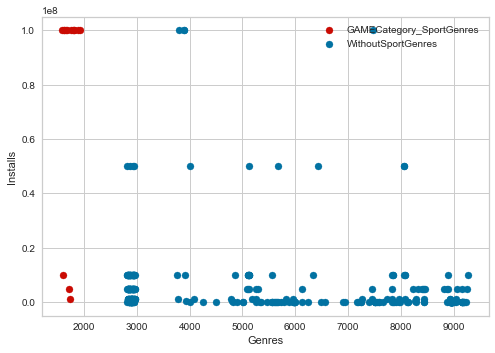

In [182]:
plt.scatter(data_sport_GAME.index,data_sport_GAME.Installs,c="r",label='GAMECategory_SportGenres')
plt.scatter(data_sport_SPORT.index,data_SPORT.Installs,c="b",label='WithoutSportGenres')
plt.legend()
plt.ylabel("Installs")
plt.xlabel("Genres")

In [183]:
print("Mean value of installs with sport genre is {}".format(gsp.loc[:,"Installs"].mean()))
print("Mean value of installs without sport genre is {}".format(gnsp.loc[:,"Installs"].mean()))

Mean value of installs with sport genre is 5642502.1996997
Mean value of installs without sport genre is 9148723.914848115


### Random Forest

In [184]:
#take 75% installs as high installs
# data_final_normal.describe().loc[:,"Installs"]["75%"]

In [185]:

# from sklearn.preprocessing import StandardScaler
# Y=data_final_normal.iloc[:,data_final_normal.columns.to_list().index("Installs")]
# mask=list(range(1,len(data_final_normal.columns.to_list())))
# mask.remove(data_final_normal.columns.to_list().index("Installs"))
# X=data_final_normal.iloc[:,mask]
# X_train_raw=(X-X.mean())/(X.std())
# Y_train=(Y-Y.mean())/(Y.std())

# Q2

In [186]:
#there are 585 apps with paid
# data_final_normal
data_q2=raw_data.loc[raw_data.loc[:,"Price"]!=0,:].reset_index().drop(columns=["index"])
print(data_q2.shape)
Installs_threshold=data_q2.loc[:,"Installs"].describe()["75%"]
price_threshold=data_q2.loc[:,"Price"].describe()["75%"]
data_q2.loc[:,"Installs"].describe()

(645, 12)


count    6.450000e+02
mean     1.130102e+05
std      7.046675e+05
min      1.000000e+00
25%      1.000000e+03
50%      5.000000e+03
75%      5.000000e+04
max      1.000000e+07
Name: Installs, dtype: float64

Text(0.5, 0, 'Price')

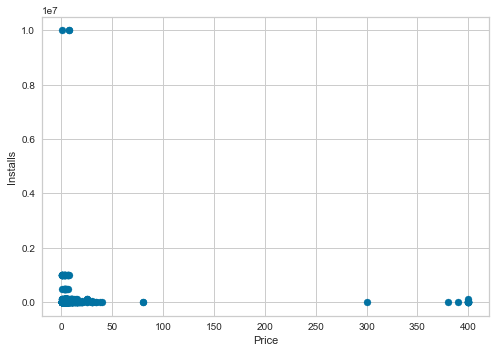

In [187]:
plt.scatter(data_q2.Price,data_q2.Installs)
plt.ylabel("Installs")
plt.xlabel("Price")

In [188]:
#shrink the data by price threshold and installs threshold, there are 299 datasets
data_q2_p=data_q2.loc[data_q2.Price<price_threshold,:].reset_index().drop(columns=["index"])
data_q2_p=data_q2_p.loc[data_q2_p.Installs<Installs_threshold,:]
data_q2_p.Installs.describe()

count      323.000000
mean      3732.421053
std       4111.531801
min          1.000000
25%        500.000000
50%       1000.000000
75%      10000.000000
max      10000.000000
Name: Installs, dtype: float64

Text(0.5, 0, 'Price')

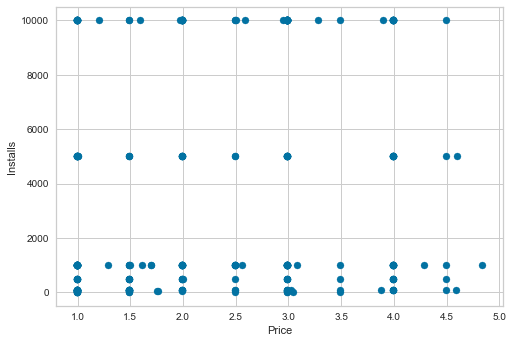

In [189]:
plt.scatter(data_q2_p.Price,data_q2_p.Installs)
plt.ylabel("Installs")
plt.xlabel("Price")

Text(0.5, 0, 'Price')

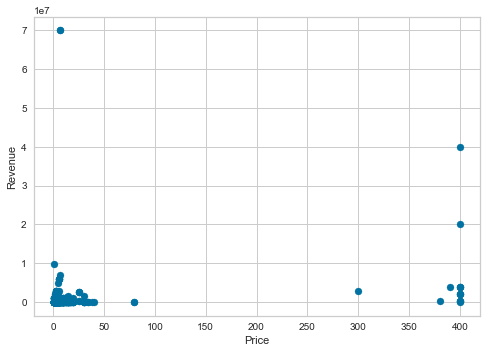

In [190]:
data_q2.loc[:,"Revenue"]=data_q2.loc[:,"Price"]*data_q2.loc[:,"Installs"]
plt.scatter(data_q2.Price,data_q2.Revenue)
plt.ylabel("Revenue")
plt.xlabel("Price")

In [191]:
data_q2.groupby(["Category"])["Price"].count()

Category
ART_AND_DESIGN           3
AUTO_AND_VEHICLES        1
BOOKS_AND_REFERENCE      8
BUSINESS                11
COMMUNICATION           22
DATING                   4
EDUCATION                4
ENTERTAINMENT            2
FAMILY                 161
FINANCE                 13
FOOD_AND_DRINK           2
GAME                    77
HEALTH_AND_FITNESS      12
LIFESTYLE               18
MAPS_AND_NAVIGATION      5
MEDICAL                 88
NEWS_AND_MAGAZINES       2
PARENTING                2
PERSONALIZATION         66
PHOTOGRAPHY             18
PRODUCTIVITY            18
SHOPPING                 2
SOCIAL                   2
SPORTS                  22
TOOLS                   63
TRAVEL_AND_LOCAL         8
VIDEO_PLAYERS            4
WEATHER                  7
Name: Price, dtype: int64

In [192]:
# data_family.loc[:,"Price"].describe()

In [193]:
data_family=data_q2.loc[data_q2.loc[:,"Category"]=="GAME",:].reset_index().drop(columns=["index"])
Installs_threshold=data_family.loc[:,"Installs"].describe()["75%"]
price_threshold=data_family.loc[:,"Price"].describe()["max"]
# data_family=data_family.loc[data_family.Price<price_threshold,:].reset_index().drop(columns=["index"])
data_family=data_family.loc[data_family.Installs<Installs_threshold,:].reset_index().drop(columns=["index"])
data_family

,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Revenue
0,B-52 Spirits of Glory Deluxe,GAME,4.3,12.0,100.0,Paid,0.99,Everyone,Arcade,2017-09-02,1.5.9,2.3 and up,99.00
1,B-Grade Renegade,GAME,3.9,24.0,1000.0,Paid,1.99,Teen,Action,2017-10-17,0.8.17,3.2 and up,1990.00
2,The World Ends With You,GAME,4.6,4108.0,10000.0,Paid,17.99,Everyone 10+,Arcade,2015-12-14,1.0.4,4.0 and up,179900.00
3,Traps n' Gemstones,GAME,4.5,413.0,1000.0,Paid,4.99,Everyone,Adventure,2017-05-17,1.04,4.0.3 and up,4990.00
4,Ghosts'n Goblins MOBILE,GAME,3.8,466.0,10000.0,Paid,0.99,Everyone,Arcade,2017-03-28,1.00.02,4.1 and up,9900.00
5,Lock 'n' Roll Pro - Ad Free,GAME,4.6,169.0,1000.0,Paid,0.99,Everyone,Card,2015-07-01,4.0.5,2.3.3 and up,990.00
6,Jump'N'Shoot Attack,GAME,4.1,155.0,1000.0,Paid,2.49,Everyone,Arcade,2018-05-26,1.2,4.1 and up,2490.00
7,Ghouls'n Ghosts MOBILE,GAME,3.9,168.0,5000.0,Paid,1.99,Everyone 10+,Arcade,2017-05-18,1.00.00,4.1 and up,9950.00
8,Oddworld: New 'n' Tasty,GAME,4.6,1475.0,10000.0,Paid,4.99,Teen,Action,2018-01-02,1.0.4,5.0 and up,49900.00
9,R-TYPE II,GAME,4.3,5682.0,50000.0,Paid,1.99,Everyone,Arcade,2017-03-02,1.1.5,2.3.3 and up,99500.00


In [194]:
data_family.loc[:,"Price"].describe()

count    45.000000
mean      3.815111
std       3.907272
min       0.990000
25%       0.990000
50%       1.990000
75%       4.990000
max      17.990000
Name: Price, dtype: float64

Text(0.5, 0, 'Price')

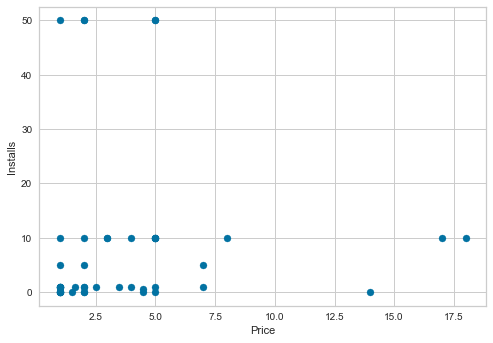

In [195]:
plt.scatter(data_family.Price,data_family.Installs/1000)
plt.ylabel("Installs")
plt.xlabel("Price")

In [196]:
from scipy.optimize import curve_fit
def func(x, a,b,c):
    return a+b/x+c/x**2
x=np.array(data_family.Price.to_list())
y=np.array(data_family.Installs.to_list())
popt, pcov = curve_fit(func, x, y,bounds=([-np.inf,0.1,0.1],[1000,np.inf,100]))
popt

array([1.00000000e+03, 8.68332593e+03, 1.00000057e-01])

(0.0, 60000.0)

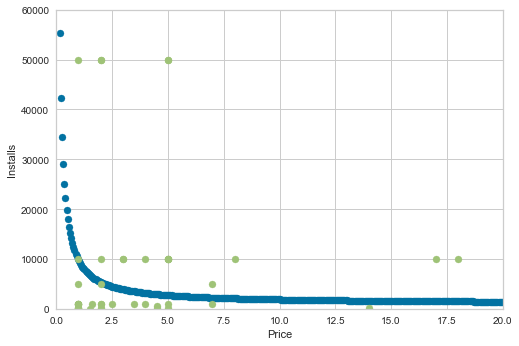

In [261]:
xdata = np.linspace(0.01, 500, 10000)
curv=func(xdata, *popt)
plt.scatter(xdata, curv)
plt.scatter(x,y)
plt.ylabel("Installs")
plt.xlabel("Price")
plt.xlim(right=20)  # adjust the right leaving left unchanged
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.ylim(top=60000)

In [198]:
data_q2=data_final_normal.copy()
data_q2.loc[:,"Price_sqrt"]=data_q2.loc[:,"Price"]**2
data_q2.loc[:,"Revenue"]=data_q2.loc[:,"Price"]*data_q2.loc[:,"Installs"]
y_q2=data_q2.loc[:,"Revenue"]
X_q2=data_q2.drop(columns=["Revenue","App"])

In [199]:
X_train_q2=(X_q2-X_q2.mean())/(X_q2.std())

In [200]:
mod_q2 = sm.OLS(y_q2,X_train_q2)
res_q2=mod_q2.fit()
res_q2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                Revenue   R-squared (uncentered):                   0.219
Model:                            OLS   Adj. R-squared (uncentered):              0.212
Method:                 Least Squares   F-statistic:                              29.01
Date:                Mon, 02 Nov 2020   Prob (F-statistic):                        0.00
Time:                        15:18:39   Log-Likelihood:                     -1.1685e+05
No. Observations:                8041   AIC:                                  2.339e+05
Df Residuals:                    7964   BIC:                                  2.344e+05
Df Model:                          77                                                  
Covariance Type:            nonrobust                                                  
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
AUTO_AND_VEHICLES         -1.322e+16   8.74e+16     -0.151      0.880   -1.85e+17    1.58e+17
BEAUTY                      6.38e+15   5.71e+16      0.112      0.911   -1.06e+17    1.18e+17
BOOKS_AND_REFERENCE          2.1e+04   6.37e+04      0.330      0.742   -1.04e+05    1.46e+05
BUSINESS                   1.539e+16   1.09e+17      0.141      0.888   -1.99e+17     2.3e+17
COMICS                    -5.128e+16   2.98e+17     -0.172      0.863   -6.35e+17    5.32e+17
COMMUNICATION              6159.2886   9.89e+04      0.062      0.950   -1.88e+05       2e+05
DATING                     1.815e+16   1.67e+17      0.109      0.913   -3.09e+17    3.45e+17
EDUCATION                  9828.0403   3.74e+04      0.262      0.793   -6.36e+04    8.32e+04
ENTERTAINMENT              1.048e+04   3.47e+04      0.302      0.763   -5.76e+04    7.86e+04
EVENTS                    -3.938e+16   2.39e+17     -0.165      0.869   -5.08e+17    4.29e+17
FAMILY                     2.304e+04   1.27e+05      0.182      0.856   -2.25e+05    2.71e+05
FINANCE                    3.237e+16   2.14e+17      0.151      0.880   -3.87e+17    4.51e+17
FOOD_AND_DRINK            -9.676e+16   5.07e+17     -0.191      0.849   -1.09e+18    8.97e+17
GAME                       1.745e+04   1.06e+05      0.165      0.869   -1.89e+05    2.24e+05
HEALTH_AND_FITNESS         8615.1878   7.86e+04      0.110      0.913   -1.45e+05    1.63e+05
HOUSE_AND_HOME            -1.834e+17   1.29e+18     -0.142      0.887   -2.71e+18    2.34e+18
LIBRARIES_AND_DEMO        -1.459e+16   1.35e+17     -0.108      0.914    -2.8e+17    2.51e+17
LIFESTYLE                  3.106e+04   1.11e+05      0.281      0.779   -1.86e+05    2.48e+05
MAPS_AND_NAVIGATION        1.378e+16   1.81e+17      0.076      0.939   -3.41e+17    3.69e+17
MEDICAL                    6.394e+16   1.55e+18      0.041      0.967   -2.97e+18    3.09e+18
NEWS_AND_MAGAZINES         5.383e+16   1.56e+18      0.035      0.972      -3e+18    3.11e+18
PARENTING                   9.25e+16   4.92e+17      0.188      0.851   -8.71e+17    1.06e+18
PERSONALIZATION            -6.23e+16   4.72e+17     -0.132      0.895   -9.88e+17    8.63e+17
PHOTOGRAPHY                4.266e+16   5.22e+17      0.082      0.935   -9.81e+17    1.07e+18
PRODUCTIVITY                5.13e+16   1.19e+18      0.043      0.966   -2.28e+18    2.38e+18
SHOPPING                   2.547e+16    3.8e+17      0.067      0.947    -7.2e+17    7.71e+17
SOCIAL                    -2.529e+17   1.18e+18     -0.215      0.830   -2.56e+18    2.06e+18
SPORTS                    -1.521e+04      6e+04     -0.253      0.800   -1.33e+05    1.02e+05
TOOLS                      5.709e+16    1.1e+18      0.052      0.959 

In [201]:
results_as_html = res_q2.summary().tables[1].as_html()
q2_table=pd.read_html(results_as_html, header=0, index_col=0)[0]
mask_final=q2_table.loc[:,'P>|t|']<0.05


In [202]:
coef_p=q2_table.loc["Price","coef"]
coef_ps=q2_table.loc["Price_sqrt","coef"]
coef_ps

256800.0

In [203]:
coef_p

-15040.0

### Revenue(Price)=256800.0 * Price ** 2-15040.0 * Price

In [204]:
#take derivative wrt Price
print("The optimal price is {}".format(-coef_p/2/coef_ps))
##given the minimum price is $ 0.99


The optimal price is 0.029283489096573207


# Q3

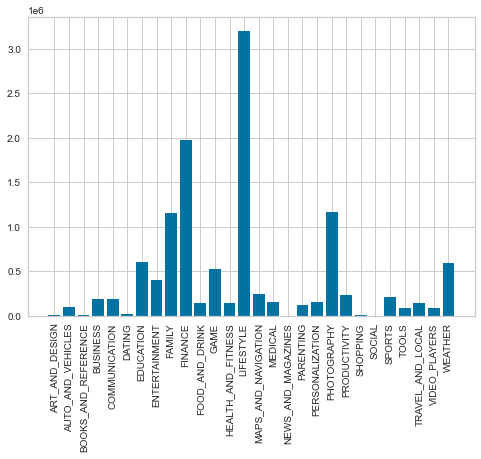

In [205]:
#bar chart by category. This question has been answered in Q1. SPORTS is significant.
data_q3=raw_data.loc[raw_data.loc[:,"Price"]!=0,:].reset_index().drop(columns=["index"])
data_q3.loc[:,"Revenue"]=data_q3.loc[:,"Price"]*data_q3.loc[:,"Installs"]
plt.bar(data_q3.groupby(["Category"])["Revenue"].mean().index,height=data_q3.groupby(["Category"])["Revenue"].mean())
plt.xticks(rotation=90)
plt.show()

In [206]:
data_q3.groupby(["Category"])["Revenue"].mean().index

Index(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BOOKS_AND_REFERENCE',
       'BUSINESS', 'COMMUNICATION', 'DATING', 'EDUCATION', 'ENTERTAINMENT',
       'FAMILY', 'FINANCE', 'FOOD_AND_DRINK', 'GAME', 'HEALTH_AND_FITNESS',
       'LIFESTYLE', 'MAPS_AND_NAVIGATION', 'MEDICAL', 'NEWS_AND_MAGAZINES',
       'PARENTING', 'PERSONALIZATION', 'PHOTOGRAPHY', 'PRODUCTIVITY',
       'SHOPPING', 'SOCIAL', 'SPORTS', 'TOOLS', 'TRAVEL_AND_LOCAL',
       'VIDEO_PLAYERS', 'WEATHER'],
      dtype='object', name='Category')

In [207]:
data_q3.Category

0                BUSINESS
1                BUSINESS
2                BUSINESS
3                BUSINESS
4           COMMUNICATION
              ...        
640       PERSONALIZATION
641                  GAME
642    HEALTH_AND_FITNESS
643                  GAME
644                FAMILY
Name: Category, Length: 645, dtype: object

In [208]:
# # X_train_q2=X_train.drop(columns=["Price"])
# mask_q2=X.loc[:,"Price"]!=0
# Y_q2=Y*X.Price
# Y_q2=Y_q2.loc[mask_q2].reset_index().drop(columns=["index"])
# X_q2=X.loc[mask_q2,:].reset_index().drop(columns=["index","Price"])

# Q4


1. app publish date: it is not fair to compare the installs between app released 10 years ago and new app
2. One year installs: fair comparison
3. Average Users Spent on APP: inAppProductPrice, another revenue source
4. APP size: high app size may present the user to install the app 
5. Development cost
6. ContainAds: Ads may prevent user to download if the potential user see bad review about ads
7. sentiment analysis for comments

# Q5

In [209]:
import pandas as pd
from tqdm import tqdm
from google_play_scraper import Sort, reviews, app
import json

In [210]:
app_packages = [
  'com.anydo',
  'com.todoist',
  'com.ticktick.task',
  'com.habitrpg.android.habitica',
  'cc.forestapp',
  'com.oristats.habitbull',
  'com.levor.liferpgtasks',
  'com.habitnow',
  'com.microsoft.todos',
  'prox.lab.calclock',
  'com.gmail.jmartindev.timetune',
  'com.artfulagenda.app',
  'com.tasks.android',
  'com.appgenix.bizcal',
  'com.appxy.planner'
]

In [211]:
temp=[]
for i in range(len(app_packages)):
    data=app(app_packages[i],lang='en',country='us')
    temp.append([data['title'],data['originalPrice'],data['released'],data['inAppProductPrice'],data['size'],data['adSupported'],data['containsAds'],data["comments"]])

In [264]:
df=pd.DataFrame(temp,columns=['title','originalPrice','released','inAppProductPrice','size','adSupported','containsAds',"comments"])
df.loc[1,"comments"]

['It really lacks a calendar view or better integration with Google Calendar (e.g. sync more than one project, add colors to tasks in Google Calendar according to labels or projects, etc.). Otherwise it has been great, I\'m really enjoying the app! Sub tasks should show their parent in "Next 7 Days" and "Today", this would be super powerful for splitting a task over several days, it would be a game changer for me!',
 "The new widget does not allow me to open the app directly, like it could before. Updates should never remove features. Knocking my review down - rest of the app is still great. Edit: this feature has indeed been fixed, however I can't raise the score because what drove me here was another bug/update. It seems that my tasks/items aren't visible on the widget. I tried a restart and everything. You can still interact with them, but the widget is just a white blank canvas where tasks should be.",
 "Been using for years, and it worked great until 1 day ago. Lists using widgets

In [265]:
import requests
from bs4 import BeautifulSoup
# from urllib.request import urlopen, Request
# import re
url="https://play.google.com/store/apps/details?id=com.facebook.katana"
app_page = requests.get(url)
# # # re.compile("AF_initDataCallback[\s\S]*?<\/script").findall(app_page)
# soup = BeautifulSoup(app_page.content, 'html.parser')
# # # app_page

# # app_page = requests.get(url)
# # soup = BeautifulSoup(app_page.content, 'html.parser')
# # a=soup.find("meta", {"itemprop": "url"})['content']
# soup

In [266]:
soup = BeautifulSoup(app_page.content, "lxml", from_encoding="utf8")

In [267]:
title = soup.select_one('h1[itemprop="name"] span').text
title

'Facebook'

In [268]:
category = [c.attrs["href"].split("/")[-1] for c in soup.select('a[itemprop="genre"]')]
category

['SOCIAL']

In [269]:
description_soup = soup.select_one('div[itemprop="description"] span div')
description_soup

<div jsname="sngebd">Keeping up with friends is faster and easier than ever. Share updates and photos, engage with friends and Pages, and stay connected to communities important to you. <br/><br/>Features on the Facebook app include:<br/><br/>* Connect with friends and family and meet new people on your social media network<br/>* Set status updates &amp; use Facebook emoji to help relay what’s going on in your world<br/>* Share photos, videos, and your favorite memories.<br/>* Get notifications when friends like and comment on your posts<br/>* Find local social events, and make plans to meet up with friends<br/>* Play games with any of your Facebook friends<br/>* Backup photos by saving them in albums<br/>* Follow your favorite artists, websites, and companies to get their latest news<br/>* Look up local businesses to see reviews, operation hours, and pictures<br/>* Buy and sell locally on Facebook Marketplace<br/>* Watch live videos on the go<br/><br/><br/>The Facebook app does more t

In [226]:
score = soup.select_one("div.BHMmbe").text
score

'4.2'